In [3]:
import pandas as pd
import re
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
from geopy.geocoders import Nominatim

In [217]:
attacks = pd.read_csv('data/attacks.csv',encoding = "ISO-8859-1")
#attacks.reset_index()
pd.set_option('display.max_columns', 24)
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
attacks.dropna(how = 'all')

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
attacks = attacks.dropna(thresh=3)

In [220]:
attacks['Area'][attacks['Area'].isna()] = attacks['Country']

C:\Users\filip\AppData\Local\Temp\ipykernel_13368\1970648164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks['Area'][attacks['Area'].isna()] = attacks['Country']
C:\Users\filip\AppData\Local\Temp\ipykernel_13368\1970648164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks['Area'][attacks['Area'].isna()] = attacks['Country']


In [221]:
attacks = attacks[attacks['Country'].notna()]

In [222]:
coord = {}
erros = {}
for item in attacks['Area'].unique():
    geolocator = Nominatim(user_agent = 'x')
    location = geolocator.geocode(item, timeout = None)
    if location == None:
        erros.update({item : location})
    else:
        coord.update({item : (location.latitude , location.longitude)})       



In [223]:
def plot_lat(x):
    try:
        return coord[x][0]
    except: 
        return np.NaN
    
    

attacks["Latitude"] = attacks['Area'].apply(plot_lat)
  

In [224]:
def plot_long(x):
    try:
        return coord[x][1]
    except: 
        return np.NaN

attacks["Longitude"] = attacks['Area'].apply(plot_long)
    

In [225]:
attacks.loc[attacks['Latitude'].isna(),'Area'] = attacks['Country']

In [308]:
attacks = pd.read_csv('data/attacks_coord.csv',encoding = "ISO-8859-1")

In [228]:
attacks[attacks['Latitude'].isna()]['Area'].unique()
coord2 = {}
erros2 = {}

for item in attacks[attacks['Latitude'].isna()]['Area'].unique():
    geolocator = Nominatim(user_agent = 'x')
    location = geolocator.geocode(item, timeout = None)
    if location == None:
        erros2.update({item : location})
    else:
        coord2.update({item : (location.latitude , location.longitude)})     


In [232]:
def plot_lat2(x):
    
    if x in coord2:
        return coord2[x][0]
    elif x in coord:
        return coord[x][0]
    else:
        return np.NaN
        
    
attacks["Latitude"]= attacks['Area'].apply(plot_lat2)

In [235]:
def plot_long2(x):
    
    if x in coord2:
        return coord2[x][1]
    elif x in coord:
        return coord[x][1]
    else:
        return np.NaN
        
    
attacks["Longitude"]= attacks['Area'].apply(plot_long2)

In [248]:
attacks['Latitude'][14]

-24.7761086

In [245]:
attacks.to_csv('data/attacks_coord.csv', 
                         sep = ",", 
                         decimal = ".", 
                         encoding = "ISO-8859-1")

In [378]:
attacks['Months'] = attacks['Case Number'].str.findall('\d{4}\.(\d{2})')

In [379]:
pd.set_option('display.max_rows', None)

attacks["Months"] = attacks["Months"].apply(lambda x: int(x[0]) if type(x) == list and len(x) > 0 else np.NaN)


In [404]:
attacks['Hemisphere'] = attacks['Latitude'].apply(lambda x : 'North' if x > 0 else('South' if x < 0 else np.NaN))

In [406]:
def season(hem, mon):
    if mon >= 1.0 and mon <= 3.0:
        if hem == 'South':
            return 'Summer'
        elif hem == 'North':
            return 'Winter'
        else:
            return np.NaN
    elif mon >= 4.0 and mon <= 6.0:
        if hem == 'South':
            return 'Autumn'
        elif hem == 'North':
            return 'Spring'
        else:
            return np.NaN
    elif mon >= 7.0 and mon <= 9.0:
        if hem == 'South':
            return 'Winter'
        elif hem == 'North':
            return 'Summer'
        else:
            return np.NaN
    elif mon >= 10 and mon <= 12.0:
        if hem == 'South':
            return 'Spring'
        elif hem == 'North':
            return 'Autumn'
        else:
            return np.NaN
    else:
        return np.NaN



attacks['Season'] = np.vectorize(season)(attacks['Hemisphere'], attacks['Months'])

C:\Users\filip\anaconda3\lib\site-packages\numpy\lib\function_base.py:2387: RuntimeWarning: invalid value encountered in season (vectorized)
  outputs = ufunc(*inputs)


In [4]:
attacks = pd.read_csv('data/attacks_final.csv',encoding = "ISO-8859-1")

In [5]:
attacks['Season'].value_counts()

Summer    2347
Spring    1528
Autumn    1083
Winter     766
Name: Season, dtype: int64

In [6]:
attacks['Hemisphere'].value_counts()

North    3470
South    2771
Name: Hemisphere, dtype: int64

In [7]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [8]:
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


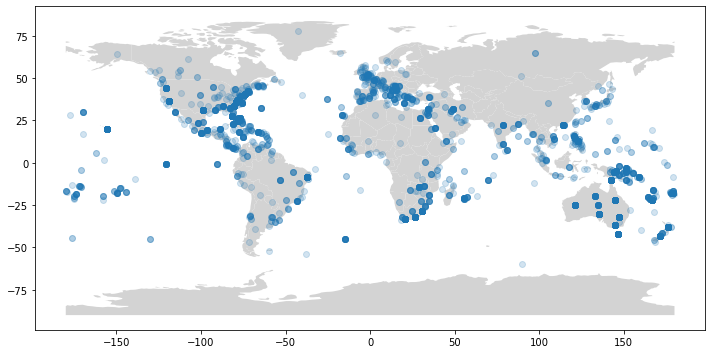

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)
x = attacks['Longitude']
y = attacks['Latitude']
plt.scatter(x, y, alpha=0.2, vmin=0,
            cmap='autumn')

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
attacks[attacks['Country'] == 'BRAZIL']['Area'].value_counts()

Pernambuco              74
Rio de Janeiro          11
BRAZIL                   8
Maranhão                 5
Bahia                    3
Alagoas                  2
Rio Grande de Norte      2
Boi Island, Victoria     1
Fernando de Noronha      1
Santa Catarina State     1
Balneário Camboriú       1
Rio Grande Do Sul        1
Porto Seguro             1
Paraiba                  1
Name: Area, dtype: int64